### 🧩 Stage 4. Effect_Size_Data.csv

This file contains detailed psychological outcome data gathered from multiple research studies evaluating the effects of meditation.  
Each row represents a specific measurement within a study, often comparing a treatment group (meditation) with a control group, at a particular time point and using a particular psychological scale.

---

### 🔑 Key Columns and Their Meaning:

#### 🔷 Study Identifiers
| Column             | Description                                                                 |
|--------------------|-----------------------------------------------------------------------------|
| **report_id**      | Unique identifier for each source/publication (e.g., author-year format)    |
| **study_id**       | Unique identifier for each study within a report                            |
| **treatment_id**   | ID for the treatment group in the study                                     |
| **comparison_id**  | ID for the control or comparison group                                      |
| **outcome_id**     | Unique identifier for each outcome measured                                 |
| **effectsize_id**  | Identifier for each effect size calculation in the meta-analysis            |

---

#### 🔷 Outcome Information
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **o_short**    | Short label for the psychological scale used (e.g., BDI-II, PSS-10)          |
| **o_cat**      | Outcome category (e.g., depression, stress, anxiety)                         |
| **o_sub**      | Outcome subcategory                                                          |
| **o_cons**     | Indicates whether the outcome is considered “consistent” across studies      |

---

#### 🔷 Measurement Timing & Results
| Column         | Description                                                                 |
|----------------|-----------------------------------------------------------------------------|
| **e_time**     | Time point of measurement (in weeks since study start)                       |
| **e_tn**       | Number of participants in the treatment group                                |
| **e_cn**       | Number of participants in the control group                                  |
| **e_tmean**    | Mean score for the treatment group                                           |
| **e_cmean**    | Mean score for the control group                                             |
| **e_tsd**      | Standard deviation for the treatment group                                   |
| **e_csd**      | Standard deviation for the control group                                     |
| **e_effect**   | Effect size, if calculated                                                   |
| **e_mean_adj** | Adjusted mean value, if applicable                                           |
| **e_confi**    | Confidence indicator (may refer to level of statistical confidence)          |

---

### 🧠 Use & Analytical Purpose

This dataset enables us to:
- Compare mean outcomes between groups
- Track how psychological states evolve over time during meditation programs
- Identify which scales most consistently reflect changes
- Perform both descriptive and inferential statistical analysis (e.g., trends, effect sizes, confidence intervals)

It provides the foundation for building a standardized, long-format **core dataset** used for visualizations and further exploration.


### 📥 Step 1. Loading the Data

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
import os

In [2]:
effect_size_data = pd.read_csv('https://raw.githubusercontent.com/MaidanchukIrina/Meditation_Stress_Project/main/Stage%204.%20Effect%20size/Effect_Size_Data.csv')


In [3]:
print(effect_size_data.head(10))

   report_id  study_id  treatment_id  comparison_id  outcome_id  \
0          1         1             1              1           1   
1          1         1             1              1           1   
2          3         2             1              1           1   
3          3         2             1              1           1   
4          3         2             1              1           1   
5          4         3             1              1           1   
6          4         3             1              1           1   
7          4         3             1              1           1   
8          5         4             1              1           1   
9          5         4             1              1           1   

   effectsize_id  o_cat  o_sub  o_cons o_short  ...  e_page  e_tn  e_cn  \
0              1      1      2       3  BDI-II  ...       3  15.0  15.0   
1              1      1      2       3  BDI-II  ...       3  15.0  15.0   
2              1      1      1       

### 🧼 Step 2. Filtering and Selecting Psychological Scales

The raw dataset contains outcome measures from over 50 different psychological scales.  
To ensure clarity and analytical focus, I selected **six core scales** that:

- Are among the most frequently used across studies  
- Evaluate **negative emotional states**, where lower scores = improvement  
- Provide clear, consistent interpretation across time and groups

🧠 **Selected Scales:**

| Scale     | Description                        |
|-----------|------------------------------------|
| BDI-II    | Depression                         |
| PSS-10    | Perceived Stress (10 items)        |
| PSS-14    | Perceived Stress (14 items)        |
| PANAS-n   | Negative Affect                    |
| BAI       | Anxiety                            |
| CES-D     | Depressive Symptoms                |

Other scales, such as **PANAS-p** (Positive Affect), will be analyzed separately due to their opposite interpretation logic (higher score = better outcome).

---

In [4]:
selected_scales = ['BDI-II', 'PSS-10', 'PSS-14', 'PANAS-n', 'BAI', 'CES-D']
core_df = effect_size_data [effect_size_data ['o_short'].isin(selected_scales)].copy()

### 🔄 Step 3. Transforming the Dataset to Long Format

The raw data follows a **wide format**, with separate columns for treatment and control group statistics (`e_tmean`, `e_cmean`, etc.).  
While that structure is common in meta-analytic reporting, it’s not ideal for analysis and visualization in tools like Python, Tableau, or Power BI.

To resolve this, I:

- Combined the two score columns (`e_tmean` and `e_cmean`) into a single `mean_score` column  
- Created a new column `group`, marking each row as either `treatment` or `control`  
- Retained time (`e_time`), study ID, and scale name for further analysis

📊 The resulting **long-format dataset** supports grouped analysis, filtering, and time-series visualization with minimal additional effort.

In [5]:
core_long = core_df.melt(
    id_vars=['study_id', 'o_short', 'e_time'],
    value_vars=['e_tmean', 'e_cmean'],
    var_name='group_type',
    value_name='mean_score'
)

In [6]:
group_mapping = {
    'e_tmean': 'treatment',  # Treatment
    'e_cmean': 'control'     # Control
}
core_long['group'] = core_long['group_type'].map(group_mapping)

In [7]:
core_dataset = core_long[['study_id', 'o_short', 'e_time', 'group', 'mean_score']].dropna()

In [9]:
print(core_dataset.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 300 entries, 0 to 299
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   study_id    300 non-null    int64  
 1   o_short     300 non-null    object 
 2   e_time      300 non-null    float64
 3   group       300 non-null    object 
 4   mean_score  300 non-null    float64
dtypes: float64(2), int64(1), object(2)
memory usage: 11.8+ KB
None


In [10]:
print(core_dataset.head())

   study_id o_short  e_time      group  mean_score
0         1  BDI-II    12.0  treatment        6.13
1         1  BDI-II    20.0  treatment        6.51
2         2  PSS-10    24.0  treatment       13.18
3         2  PSS-10    48.0  treatment       14.13
4         2  PSS-10    72.0  treatment       13.31


### 🧹 Step. 4. Checking for Missing Values and Outliers

Before moving on to visualizations, it's essential to examine the **data quality** within the core dataset.  
This step helps ensure that our analysis is based on valid, interpretable values and not skewed by extreme outliers or missing entries.

---

#### 🔍 Missing Values

We start by checking whether there are any `NaN` or null values in key columns:

- `mean_score` — The central metric for visual comparison
- `e_time` — Time tracking across the study
- `group` — Required for treatment vs control comparison
- `o_short` — Psychological scale name

If any of these are missing, we must decide whether to:
- Drop the rows
- Impute values (only in some cases)
- Flag them for exclusion in visualizations




In [9]:
print("Missing Values Summary:")
print(core_dataset.isna().sum())

Missing Values Summary:
study_id      0
o_short       0
e_time        0
group         0
mean_score    0
dtype: int64


#### 📉 Outlier Detection

Outliers in psychological scores can distort visualizations and affect mean-based insights.

We will:

- Generate boxplots per scale to visually inspect score distributions
- Compare data with outcome extremums for choosen scales
- Consider whether to:
  - Exclude extreme values
  - Cap (winsorize) outliers
  - Leave them in (if they are valid extreme cases)

The goal is not to "clean too much" but to make **conscious decisions** based on observed patterns.

---

This stage ensures that what we visualize next truly reflects the central trends in the data — not just statistical noise or inconsistencies.

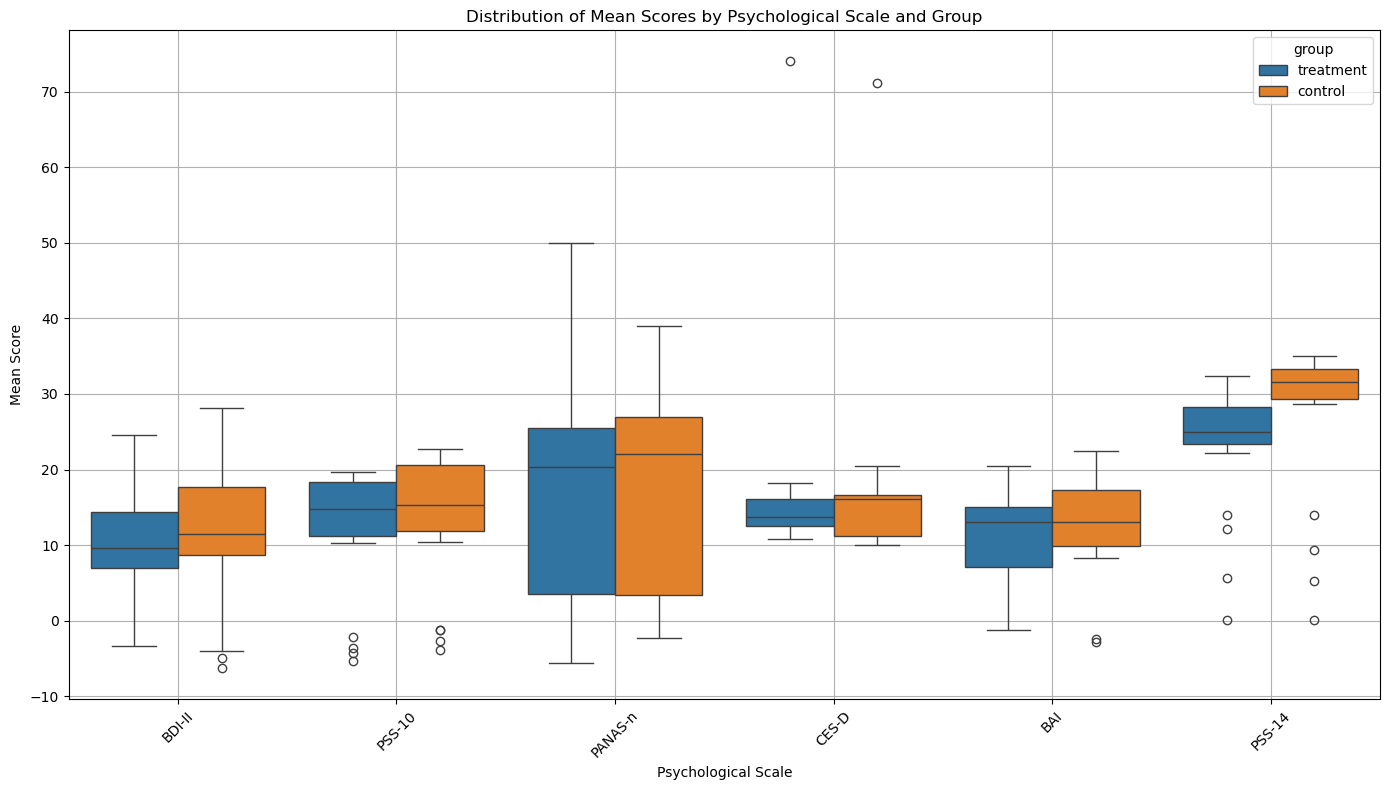

In [10]:
plt.figure(figsize=(14, 8))
sns.boxplot(data=core_dataset, x='o_short', y='mean_score', hue='group')
plt.title('Distribution of Mean Scores by Psychological Scale and Group')
plt.xlabel('Psychological Scale')
plt.ylabel('Mean Score')
plt.xticks(rotation=45)
plt.grid(True)
plt.tight_layout()
plt.show()

### 📈 Step 5. First Visualizations

With the cleaned long-format dataset in place, the next step is to explore the data visually.

I started with a single scale — **BDI-II** (Beck Depression Inventory) — to compare the average depression scores in treatment and control groups over time.

The resulting line plot reveals:

- How psychological states evolve over time in different study groups  
- Potential differences in trends between meditation participants and control subjects  
- Early insights into where and how meditation appears to have the strongest impact

These visualizations form the first layer of interpretation and guide deeper analytical questions in the next stages.